#I would try some classification algorythms as well

understanding pc_y_train.csv I can imagine a classification problem with the following classes:

0.5

1

1.5

...

5

5.5

6

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import make_pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay, classification_report
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
XTRAIN = pd.read_csv("pc_X_train.csv")
YTRAIN = pd.read_csv("pc_y_train.csv")
testX = pd.read_csv("pc_X_test.csv")

XTRAIN.drop(['id'], axis=1, inplace=True)
YTRAIN.drop(['id'], axis=1, inplace=True)
testX.drop(['id'], axis=1, inplace=True)

In [3]:
XTRAIN

,mean_down_time,std_down_time,max_down_time,sum_down_time,mean_up_time,std_up_time,max_up_time,sum_up_time,mean_length_activity,std_length_activity,...,change_12_std,change_13_count,change_13_mean,change_13_std,change_14_count,change_14_mean,change_14_std,count_action_time_grade2,max_cursor_grade2,max_word_count_grade2
0,1.034313e+06,485886.146513,1897766,2146200507,1.034428e+06,485882.738602,1897888,2146437073,5.604819,1.865015,...,0.000000,0,0.000000,0.000000,0,0.00000,0.0000,4,5,6
1,8.831101e+05,449458.736461,1799921,5319855058,8.832070e+05,449458.075056,1800028,5320439045,5.753154,1.933647,...,0.000000,2,0.000332,0.018220,5,0.00083,0.0288,12,14,14
2,7.466693e+05,422263.660049,1784840,4836176929,7.467595e+05,422264.140695,1784841,4836760995,6.297977,2.538673,...,0.024845,0,0.000000,0.000000,0,0.00000,0.0000,12,12,12
3,9.445934e+05,525116.282094,1855277,3076540622,9.447333e+05,525110.448774,1855454,3076996429,5.393614,1.571532,...,0.024776,12,0.003684,0.060596,0,0.00000,0.0000,6,9,8
4,5.856043e+05,271637.642717,1754492,1856951382,5.857008e+05,271643.202952,1754540,1857257379,5.559445,1.708906,...,0.000000,0,0.000000,0.000000,0,0.00000,0.0000,6,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,8.489734e+05,498248.440477,1801516,3885751066,8.490789e+05,498239.581432,1801614,3886234064,6.736509,2.463112,...,0.000000,0,0.000000,0.000000,0,0.00000,0.0000,9,5,5
1972,1.164593e+06,490107.742542,1914090,4029492836,1.164676e+06,490106.021122,1914238,4029780078,7.144798,3.164857,...,0.024039,0,0.000000,0.000000,0,0.00000,0.0000,6,3,4
1973,8.536839e+05,364856.690314,1577834,1905422440,8.537940e+05,364855.112393,1577895,1905668155,6.121864,2.439850,...,0.000000,0,0.000000,0.000000,0,0.00000,0.0000,4,5,5
1974,8.579854e+05,520897.668385,1797367,5612082184,8.580722e+05,520888.996206,1797464,5612650560,5.562605,1.847786,...,0.012365,0,0.000000,0.000000,0,0.00000,0.0000,13,18,19


In [4]:
YTRAIN

,score
0,3.5
1,5.5
2,5.0
3,2.5
4,5.0
...,...
1971,3.5
1972,2.5
1973,3.5
1974,5.5


In [5]:
YTRAIN.groupby(by='score').agg(MyCount=('score', 'count'))


,MyCount
score,
0.5,5
1.0,26
1.5,52
2.0,77
2.5,160
3.0,266
3.5,389
4.0,411
4.5,312


In [6]:
#YTRAIN_one_others = pd.DataFrame(np.where(YTRAIN['score']==4.0, 1,0), columns=['score'])
#YTRAIN_one_others = YTRAIN_one_others.values.ravel()

As in regression part I already made some probes of data preprocessing, I will just use on of my bests here

In [7]:
varianceSelected = VarianceThreshold()
x_train_variance_selected = varianceSelected.fit_transform(XTRAIN)
featuresOut = varianceSelected.get_feature_names_out()
x_train_variance_selected = pd.DataFrame(x_train_variance_selected, columns=featuresOut)

kBest = SelectKBest(f_classif, k=350)
kBest.fit(x_train_variance_selected, YTRAIN['score'])
x_train_k_best = kBest.transform(x_train_variance_selected)
featuresOut = kBest.get_feature_names_out()
x_train_k_best = pd.DataFrame(x_train_k_best, columns=featuresOut)

lda = LinearDiscriminantAnalysis()
lda.fit(x_train_k_best, YTRAIN['score']*2)
LDA = pd.DataFrame(lda.transform(x_train_k_best), columns=lda.get_feature_names_out())

X_train, x_val, y_train, y_val = train_test_split(x_train_k_best, YTRAIN['score'])

standardSc = StandardScaler().fit(X_train)
X_train = pd.DataFrame(standardSc.transform(X_train), index=X_train.index, columns=X_train.columns)
x_val = pd.DataFrame(standardSc.transform(x_val), index=x_val.index, columns=x_val.columns)
X_train

,mean_down_time,std_down_time,sum_down_time,mean_up_time,std_up_time,sum_up_time,std_length_activity,sum_length_activity,mean_length_down_event,std_length_down_event,...,change_12_count,change_13_count,change_13_mean,change_13_std,change_14_count,change_14_mean,change_14_std,count_action_time_grade2,max_cursor_grade2,max_word_count_grade2
1212,0.749826,0.964751,2.316996,0.749726,0.964688,2.316928,0.654021,2.297675,1.645101,1.342648,...,1.263550,-0.232945,-0.212217,-0.297915,-0.309624,-0.289297,-0.358387,2.130190,0.329640,0.193931
1508,-0.399012,-0.640377,-0.695366,-0.398875,-0.640402,-0.695332,-0.020777,-0.699087,-0.469881,-0.279534,...,1.263550,-0.232945,-0.212217,-0.297915,-0.309624,-0.289297,-0.358387,-0.710773,-0.596769,-0.690395
1044,0.669037,-0.432125,-0.600780,0.668878,-0.432210,-0.600884,-0.121148,-0.993451,0.179280,0.606826,...,4.601483,-0.232945,-0.212217,-0.297915,1.790436,3.913364,3.690720,-1.026436,-1.214374,-0.985170
1297,0.230185,0.493995,0.311946,0.230226,0.494029,0.311984,0.201611,0.201507,-0.270540,-0.325838,...,-0.405417,0.935326,0.538711,1.667549,-0.309624,-0.289297,-0.358387,0.236214,0.638442,0.783482
1959,-0.707002,-0.878568,-0.421260,-0.707026,-0.878556,-0.421236,0.115489,0.113998,0.924066,1.078569,...,-0.405417,0.935326,0.614254,1.764017,-0.309624,-0.289297,-0.358387,-0.079448,-0.596769,-0.690395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,-0.124631,0.668156,-0.346510,-0.124680,0.668157,-0.346541,0.449781,-0.284937,0.416482,0.594472,...,-0.405417,-0.232945,-0.212217,-0.297915,-0.309624,-0.289297,-0.358387,-0.395111,-0.596769,-0.690395
541,0.520103,0.670118,1.338907,0.520012,0.670120,1.338856,-0.152811,1.082664,0.314089,0.792315,...,-0.405417,-0.232945,-0.212217,-0.297915,-0.309624,-0.289297,-0.358387,1.183202,0.947245,0.783482
1234,-0.134084,0.838632,-0.226700,-0.134077,0.838575,-0.226692,0.003202,-0.105786,0.953292,1.369064,...,1.263550,-0.232945,-0.212217,-0.297915,-0.309624,-0.289297,-0.358387,-0.079448,-0.596769,-0.690395
916,-0.843193,-0.947829,-1.038503,-0.843221,-0.947824,-1.038542,-0.555646,-1.060380,-0.694741,-0.817382,...,-0.405417,-0.232945,-0.212217,-0.297915,-0.309624,-0.289297,-0.358387,-1.026436,-0.905571,-0.985170


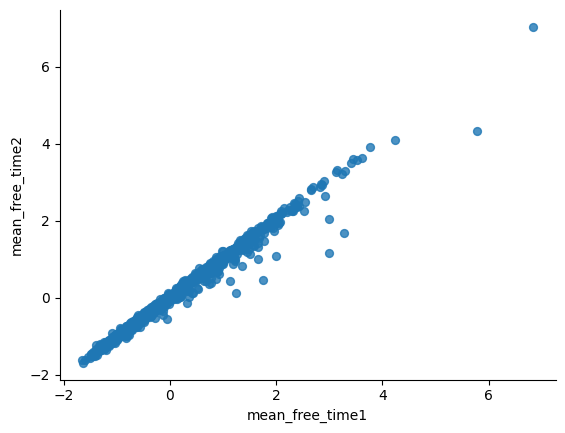

In [8]:
X_train.plot(kind='scatter', x='mean_free_time1', y='mean_free_time2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
#also mean_free_time5 and mean_free_time7

In [9]:
#X_train.drop(columns=['mean_free_time1', 'mean_free_time2', 'mean_free_time5', 'mean_free_time7', 'mean_cursor_position_change5', 'mean_cursor_position_word_count_change5', 'mean_cursor_position_word_count_change10'], inplace=True)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 1212 to 1356
Columns: 350 entries, mean_down_time to max_word_count_grade2
dtypes: float64(350)
memory usage: 4.0 MB


In [11]:
X_train

,mean_down_time,std_down_time,sum_down_time,mean_up_time,std_up_time,sum_up_time,std_length_activity,sum_length_activity,mean_length_down_event,std_length_down_event,...,change_12_count,change_13_count,change_13_mean,change_13_std,change_14_count,change_14_mean,change_14_std,count_action_time_grade2,max_cursor_grade2,max_word_count_grade2
1212,0.749826,0.964751,2.316996,0.749726,0.964688,2.316928,0.654021,2.297675,1.645101,1.342648,...,1.263550,-0.232945,-0.212217,-0.297915,-0.309624,-0.289297,-0.358387,2.130190,0.329640,0.193931
1508,-0.399012,-0.640377,-0.695366,-0.398875,-0.640402,-0.695332,-0.020777,-0.699087,-0.469881,-0.279534,...,1.263550,-0.232945,-0.212217,-0.297915,-0.309624,-0.289297,-0.358387,-0.710773,-0.596769,-0.690395
1044,0.669037,-0.432125,-0.600780,0.668878,-0.432210,-0.600884,-0.121148,-0.993451,0.179280,0.606826,...,4.601483,-0.232945,-0.212217,-0.297915,1.790436,3.913364,3.690720,-1.026436,-1.214374,-0.985170
1297,0.230185,0.493995,0.311946,0.230226,0.494029,0.311984,0.201611,0.201507,-0.270540,-0.325838,...,-0.405417,0.935326,0.538711,1.667549,-0.309624,-0.289297,-0.358387,0.236214,0.638442,0.783482
1959,-0.707002,-0.878568,-0.421260,-0.707026,-0.878556,-0.421236,0.115489,0.113998,0.924066,1.078569,...,-0.405417,0.935326,0.614254,1.764017,-0.309624,-0.289297,-0.358387,-0.079448,-0.596769,-0.690395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,-0.124631,0.668156,-0.346510,-0.124680,0.668157,-0.346541,0.449781,-0.284937,0.416482,0.594472,...,-0.405417,-0.232945,-0.212217,-0.297915,-0.309624,-0.289297,-0.358387,-0.395111,-0.596769,-0.690395
541,0.520103,0.670118,1.338907,0.520012,0.670120,1.338856,-0.152811,1.082664,0.314089,0.792315,...,-0.405417,-0.232945,-0.212217,-0.297915,-0.309624,-0.289297,-0.358387,1.183202,0.947245,0.783482
1234,-0.134084,0.838632,-0.226700,-0.134077,0.838575,-0.226692,0.003202,-0.105786,0.953292,1.369064,...,1.263550,-0.232945,-0.212217,-0.297915,-0.309624,-0.289297,-0.358387,-0.079448,-0.596769,-0.690395
916,-0.843193,-0.947829,-1.038503,-0.843221,-0.947824,-1.038542,-0.555646,-1.060380,-0.694741,-0.817382,...,-0.405417,-0.232945,-0.212217,-0.297915,-0.309624,-0.289297,-0.358387,-1.026436,-0.905571,-0.985170


In [12]:
Xcorr = X_train.corr()
Xcorr.style.background_gradient(cmap='coolwarm')

Output hidden; open in https://colab.research.google.com to view.

In [13]:
cols = np.full((Xcorr.shape[0],), True, dtype=bool)
for i in range(Xcorr.shape[0]):
  for j in range(i+1, Xcorr.shape[0]):
    if 0.8 <= Xcorr.iloc[i,j]:
      if cols[j]:
        cols[j] = False
selected = X_train.columns[cols]
X_train = X_train[selected]
X_train

,mean_down_time,std_down_time,sum_down_time,std_length_activity,mean_length_down_event,mean_length_activity-length_down_event,std_length_activity-length_down_event,mean_length_activity/length_down_event,std_length_activity/length_down_event,max_length_activity/length_down_event,...,event_19_count,event_20_std,event_22_count,event_23_count,event_24_mean,event_25_count,event_26_count,event_28_count,event_29_mean,change_0_std
1212,0.749826,0.964751,2.316996,0.654021,1.645101,-0.898553,-0.359545,-1.892917,1.484692,-0.651741,...,0.776157,-0.605417,-0.500467,0.896244,-0.310476,-0.309179,-0.316201,-0.233949,-0.074175,-0.011452
1508,-0.399012,-0.640377,-0.695366,-0.020777,-0.469881,0.316429,-0.356479,0.595366,-0.562586,0.188337,...,-0.563957,1.898526,2.875975,0.896244,-0.310476,-0.309179,-0.316201,-0.233949,-0.074175,-0.317676
1044,0.669037,-0.432125,-0.600780,-0.121148,0.179280,-0.794206,-0.654412,-0.224368,0.956799,-0.651741,...,0.329452,4.001393,-0.500467,3.500625,-0.310476,1.038479,-0.316201,-0.233949,-0.074175,0.551682
1297,0.230185,0.493995,0.311946,0.201611,-0.270540,0.303096,0.785209,0.171233,-0.155823,0.188337,...,-0.563957,-0.605417,0.625014,-0.405946,-0.310476,-0.309179,-0.316201,0.933434,-0.074175,0.212522
1959,-0.707002,-0.878568,-0.421260,0.115489,0.924066,-1.069085,-0.208564,-1.080436,1.531422,0.188337,...,-0.117252,0.800756,-0.500467,-0.405946,-0.310476,-0.309179,-0.316201,0.933434,-0.074175,-0.124566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,-0.124631,0.668156,-0.346510,0.449781,0.416482,-0.204184,0.635640,-0.482020,0.719196,-0.651741,...,-0.563957,0.963988,-0.500467,-0.405946,-0.310476,-0.309179,-0.316201,-0.233949,-0.074175,0.192820
541,0.520103,0.670118,1.338907,-0.152811,0.314089,-0.723371,-0.378692,-0.239813,0.886203,-0.651741,...,-0.563957,0.985659,0.625014,-0.405946,-0.310476,-0.309179,-0.316201,-0.233949,-0.074175,-0.627351
1234,-0.134084,0.838632,-0.226700,0.003202,0.953292,-1.193348,-0.212077,-0.888310,1.560095,0.188337,...,-0.117252,-0.605417,-0.500467,0.896244,-0.310476,-0.309179,-0.316201,-0.233949,-0.074175,-1.107460
916,-0.843193,-0.947829,-1.038503,-0.555646,-0.694741,-0.081431,-0.207017,0.560000,-0.328692,-0.651741,...,-0.563957,-0.605417,-0.500467,-0.405946,-0.310476,-0.309179,-0.316201,-0.233949,-0.074175,0.132106


In [14]:
Xcorr1 = X_train.corr()
Xcorr1.style.background_gradient(cmap='coolwarm')

,mean_down_time,std_down_time,sum_down_time,std_length_activity,mean_length_down_event,mean_length_activity-length_down_event,std_length_activity-length_down_event,mean_length_activity/length_down_event,std_length_activity/length_down_event,max_length_activity/length_down_event,mean_length_down_event/length_text_change,mean_free_time1,std_free_time1,sum_free_time1,mean_cursor_position_change1,std_cursor_position_change1,max_cursor_position_change1,sum_cursor_position_change1,mean_word_count_change1,std_action_time,cursor_speed,activity_3_count,event_1_mean,event_3_count,event_5_count,event_6_std,event_7_count,event_7_mean,event_8_count,event_8_mean,event_11_count,event_12_count,event_13_count,event_16_count,event_17_count,event_18_count,event_19_count,event_20_std,event_22_count,event_23_count,event_24_mean,event_25_count,event_26_count,event_28_count,event_29_mean,change_0_std
mean_down_time,1.000000,0.535997,0.571067,0.118296,0.176970,-0.040929,0.009838,-0.173509,0.098772,0.026908,0.123641,-0.011235,-0.168504,0.219286,-0.031973,-0.186303,-0.103403,0.092992,-0.186516,0.003622,-0.008689,0.077425,-0.062665,0.033658,-0.000217,0.116636,0.079984,-0.043641,0.042130,-0.103130,0.034378,0.060650,0.024538,0.063414,0.030027,0.015282,0.020110,0.013983,-0.022644,0.024903,-0.022907,0.033129,0.013223,0.035123,-0.012044,0.034750
std_down_time,0.535997,1.000000,0.589502,0.154385,0.246989,-0.083176,0.010657,-0.244759,0.182042,0.064781,0.197577,-0.143880,-0.297508,0.394303,-0.144173,-0.030954,0.046060,0.200647,-0.284325,0.006827,-0.089998,0.150312,-0.074743,0.071026,0.090945,0.131272,0.243690,-0.097322,0.159045,-0.071082,0.086806,0.090413,0.102932,0.041121,0.099799,0.049069,0.071243,0.054140,0.008158,0.101759,0.008471,0.069161,0.059343,0.043715,-0.013431,0.074296
sum_down_time,0.571067,0.589502,1.000000,0.232438,0.368831,-0.004563,0.074661,-0.334357,0.124534,0.162777,0.236450,-0.580474,-0.394611,0.006152,-0.250269,0.025767,0.218255,0.492097,-0.428364,0.032036,-0.126920,0.215070,-0.240645,0.265626,0.067374,0.166749,0.521875,-0.290081,0.545658,0.108759,0.108323,0.092377,0.320029,0.099703,0.262286,0.271536,0.224203,0.058754,0.065727,0.185614,-0.062041,0.142441,0.236502,0.003310,0.009864,0.026286
std_length_activity,0.118296,0.154385,0.232438,1.000000,0.775395,0.458262,0.558675,-0.737697,0.238154,0.103029,0.053598,-0.179247,-0.198601,0.016147,-0.403039,0.036705,-0.024052,-0.127692,-0.642581,0.028120,-0.205227,0.116541,-0.471221,0.528522,0.196470,0.559922,0.013926,-0.199669,0.007715,-0.135395,0.028816,0.027176,-0.014654,0.209160,0.040921,0.046088,0.012772,0.009066,0.076248,0.021926,0.012435,0.078904,0.013771,0.063763,-0.005436,0.779381
mean_length_down_event,0.176970,0.246989,0.368831,0.775395,1.000000,-0.042004,0.165578,-0.961258,0.503749,0.062451,0.406013,-0.240769,-0.228044,0.022371,-0.451092,-0.025836,-0.056005,-0.119269,-0.799199,0.013611,-0.277220,0.078202,-0.350028,0.228901,0.188986,0.550909,0.019601,-0.275673,0.009967,-0.177380,0.073502,0.117345,-0.018825,0.182657,0.019272,0.038919,0.009322,0.018261,0.071298,0.063828,-0.001941,0.072984,0.027077,0.079148,-0.019327,0.500735
mean_length_activity-length_down_event,-0.040929,-0.083176,-0.004563,0.458262,-0.042004,1.000000,0.638348,0.086537,-0.629977,0.054593,-0.629649,-0.046808,0.006568,-0.044703,-0.019218,0.002328,0.000675,0.021614,0.023513,0.007915,0.038981,0.058398,-0.438197,0.735623,-0.018693,0.102105,0.030998,-0.003283,0.018415,0.008809,-0.085751,-0.132288,0.026019,0.118262,0.045655,0.044319,-0.002379,-0.048660,0.008764,-0.047623,-0.031892,-0.009964,-0.011029,-0.025135,0.008385,0.423887
std_length_activity-length_down_event,0.009838,0.010657,0.074661,0.558675,0.165578,0.638348,1.000000,-0.255055,-0.151248,0.025384,-0.006732,-0.134763,-0.071186,-0.043075,-0.162130,-0.097203,-0.013513,-0.010158,-0.259385,-0.016595,-0.095755,-0.011663,-0.118780,0.777068,-0.078647,-0.044868,0.069844,-0.070664,0.030835,-0.067248,0.039923,-0.173968,0.045600,0.076428,0.055722,0.017084,0.067494,-0.006552,0.082106,-0

In [15]:
#x_val.drop(columns=['mean_free_time1', 'mean_free_time2', 'mean_free_time5', 'mean_free_time7', 'mean_cursor_position_change5', 'mean_cursor_position_word_count_change5', 'mean_cursor_position_word_count_change10'], inplace=True)
x_val = x_val[X_train.columns]

same on the test set:

In [16]:
x_test_variance_selected = pd.DataFrame(varianceSelected.transform(testX), columns=varianceSelected.get_feature_names_out())

x_test_k_best = pd.DataFrame(kBest.transform(x_test_variance_selected), columns=kBest.get_feature_names_out())

LDA_test = pd.DataFrame(lda.transform(x_test_k_best), columns=lda.get_feature_names_out())

#x_test_k_best.drop(columns=['mean_free_time1', 'mean_free_time2', 'mean_free_time5', 'mean_free_time7', 'mean_cursor_position_change5', 'mean_cursor_position_word_count_change5', 'mean_cursor_position_word_count_change10'], inplace=True)
XTEST = x_test_k_best[selected]
XtestCorr= XTEST.corr()
XtestCorr.style.background_gradient(cmap='coolwarm')

,mean_down_time,std_down_time,sum_down_time,std_length_activity,mean_length_down_event,mean_length_activity-length_down_event,std_length_activity-length_down_event,mean_length_activity/length_down_event,std_length_activity/length_down_event,max_length_activity/length_down_event,mean_length_down_event/length_text_change,mean_free_time1,std_free_time1,sum_free_time1,mean_cursor_position_change1,std_cursor_position_change1,max_cursor_position_change1,sum_cursor_position_change1,mean_word_count_change1,std_action_time,cursor_speed,activity_3_count,event_1_mean,event_3_count,event_5_count,event_6_std,event_7_count,event_7_mean,event_8_count,event_8_mean,event_11_count,event_12_count,event_13_count,event_16_count,event_17_count,event_18_count,event_19_count,event_20_std,event_22_count,event_23_count,event_24_mean,event_25_count,event_26_count,event_28_count,event_29_mean,change_0_std
mean_down_time,1.000000,0.582019,0.474526,0.113429,0.163134,-0.047734,0.013975,-0.160098,0.111465,0.072703,0.109279,-0.026700,-0.073080,0.260382,-0.042237,-0.212973,-0.120053,0.107042,-0.173257,0.021154,-0.097874,0.051527,-0.057689,0.035242,-0.039524,0.128804,0.083088,-0.055850,0.042305,-0.099124,0.069533,0.003387,0.022109,0.070062,0.022957,0.066775,0.060081,0.076522,-0.114168,0.043315,0.017346,0.092405,0.029062,-0.025354,0.015818,0.063267
std_down_time,0.582019,1.000000,0.487422,0.171195,0.213916,-0.063869,0.047694,-0.218958,0.168927,0.097305,0.164943,-0.223845,-0.241426,0.190945,-0.128011,-0.095229,-0.012817,0.242600,-0.217226,0.023359,-0.170190,0.083748,-0.044250,0.070433,0.077655,0.160779,0.246661,-0.142820,0.207376,0.068892,0.099437,-0.002828,0.189228,0.028395,0.129089,0.115693,0.208694,0.042745,-0.074882,0.061515,-0.028894,0.118248,0.083866,-0.005127,0.026939,0.120268
sum_down_time,0.474526,0.487422,1.000000,0.230280,0.366368,0.029011,0.100412,-0.344091,0.064624,0.142773,0.212015,-0.520672,-0.369548,-0.311100,-0.259934,0.021257,0.248297,0.587257,-0.417646,-0.013808,-0.217072,0.215792,-0.218315,0.313127,0.088465,0.100468,0.601074,-0.354356,0.627744,0.175345,0.125042,-0.019023,0.361792,0.044940,0.236793,0.377971,0.279583,0.088593,0.087959,0.202471,-0.071169,0.205101,0.307968,-0.009030,0.005065,0.046056
std_length_activity,0.113429,0.171195,0.230280,1.000000,0.763160,0.488791,0.579204,-0.724088,0.160689,0.160444,0.022465,-0.107894,-0.112392,0.106891,-0.370563,-0.018562,-0.057540,-0.104469,-0.637029,-0.037438,-0.322613,0.096311,-0.491267,0.519944,0.131939,0.533115,-0.085192,-0.341751,-0.043878,-0.173733,0.031898,-0.044578,-0.013689,0.215560,-0.026316,-0.033327,0.006958,0.006548,0.015975,0.056572,0.003729,0.088434,-0.008038,0.024270,0.073201,0.811561
mean_length_down_event,0.163134,0.213916,0.366368,0.763160,1.000000,-0.038753,0.172206,-0.969643,0.445457,0.152612,0.437759,-0.183208,-0.180081,-0.013707,-0.474357,-0.124548,-0.118788,-0.123496,-0.824681,-0.048710,-0.498812,0.076613,-0.342899,0.200498,0.064015,0.542016,-0.068009,-0.419348,-0.010821,-0.190788,0.153527,0.049963,-0.003439,0.164835,-0.043748,0.031397,-0.023125,0.060765,0.033763,0.041437,-0.022353,0.055179,0.009212,0.086334,0.060919,0.466761
mean_length_activity-length_down_event,-0.047734,-0.063869,0.029011,0.488791,-0.038753,1.000000,0.627239,0.096154,-0.625324,0.066048,-0.697183,0.003477,0.047521,0.075147,0.005207,0.103427,0.057144,0.032285,0.070488,0.031986,0.126407,0.081806,-0.473331,0.706934,0.052471,0.089115,-0.001989,-0.047625,-0.008234,-0.023409,-0.208457,-0.135107,-0.012444,0.075824,0.036970,-0.074778,0.073852,-0.108345,0.004435,0.043024,0.009427,0.096474,-0.002830,-0.096082,-0.023566,0.529641
std_length_activity-length_down_event,0.013975,0.047694,0.100412,0.579204,0.172206,0.627239,1.000000,-0.242913,-0.198420,0.035444,-0.036621,-0.097805,-0.036300,0.047037,-0.129044,-0.050514,-0.018601,0.008659,-0.251006,-0.014604,-0.099376,-0.056626,-0.187455,0.759458,0.009579,-0.068585,0.049769,-0.109556,-0.016530,-0.096066,0.060509,-0.190945,0.038268,-0.008421,0.055396,-0.056419,0.092099,-0.0186

In [17]:
y_train_one_vs_rest = np.where(y_train==4.0, 1,0).ravel()
y_val_one_vs_rest = np.where(y_val==4.0, 1,0).ravel()

In [18]:
y_val_one_vs_rest.shape

(494,)

start classification by a simple logistic regression:

results: [0.78451178 0.78787879 0.78040541 0.77027027 0.77702703]
mean score: 0.7800186550186549
standardd deviation: 0.006100824867597067
accuracy = 0.7955465587044535
rmse= 0.45216528094884345


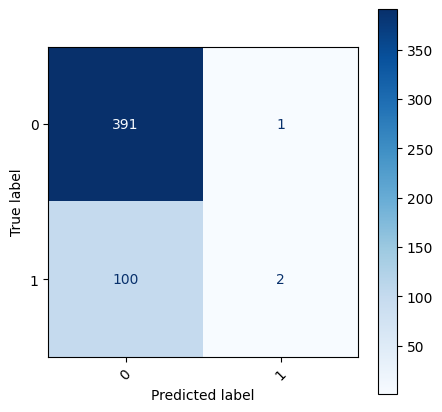

In [19]:
reg_model = LogisticRegression(max_iter=int(1e6)) # penalty="l1", solver="liblinear", tol=1e-6,    , warm_start=True
results=cross_validate(reg_model, X_train, y_train_one_vs_rest, cv=5, scoring='accuracy')

# check the results:
print("results:", results['test_score'])
print("mean score:", np.mean(results['test_score']))
print("standardd deviation:", np.std(results['test_score']))

# now I fit data and predict based on the model. Then I can check the accuracy
reg_model.fit(X_train,y_train_one_vs_rest)
y_pred = reg_model.predict(x_val)
print("accuracy =", accuracy_score(y_pred,y_val_one_vs_rest))
print("rmse=", math.sqrt(mean_squared_error(y_pred,y_val_one_vs_rest)))
# confusion matrix is more informative:
matrix = ConfusionMatrixDisplay.from_estimator(
        reg_model,
        x_val,
        y_val_one_vs_rest,
        cmap=plt.cm.Blues,
        xticks_rotation=45
    )
matrix.figure_.set_size_inches(5,5)

This performes really bad, mostly because this dataset is not for classification, however I would just like to try some other classification algorythms

#Support Vector Machine with linear and nonlinear kernel

results: [0.79194631 0.79194631 0.79054054 0.79054054 0.79054054 0.79054054
 0.79054054 0.79054054 0.79054054 0.7972973 ]
mean score: 0.7914973698530745
standardd deviation: 0.00201124108233368
0.7935222672064778
rmse= 0.4543982094963869


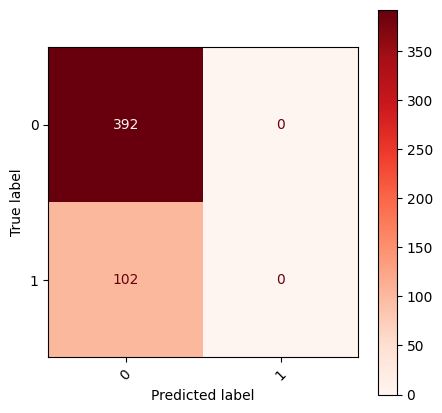

In [20]:
clf=svm.SVC(kernel='linear') # first: linear kernel is used here
results_svml=cross_validate(clf,X_train,y_train_one_vs_rest,cv=10,scoring='accuracy')

print("results:", results_svml['test_score'])
print("mean score:", np.mean(results_svml['test_score']))
print("standardd deviation:", np.std(results_svml['test_score']))
clf.fit(X_train,y_train_one_vs_rest)
y_pred = clf.predict(x_val)
print(accuracy_score(y_pred,y_val_one_vs_rest))
print("rmse=", math.sqrt(mean_squared_error(y_pred,y_val_one_vs_rest)))

matrix = ConfusionMatrixDisplay.from_estimator(
        clf,
        x_val,
        y_val_one_vs_rest,
        cmap=plt.cm.Reds,
        xticks_rotation=45
    )
matrix.figure_.set_size_inches(5,5)

results: [0.75838926 0.77181208 0.75675676 0.80405405 0.7972973  0.77027027
 0.75       0.78378378 0.77702703 0.78378378]
mean score: 0.7753174315254853
standardd deviation: 0.016628241557434306
0.7753036437246964
rmse= 0.474021472377891


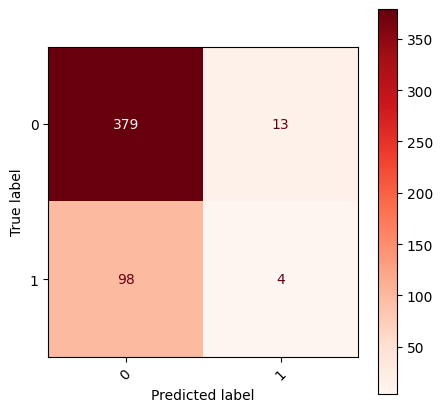

In [21]:
clf_p=svm.SVC(kernel='poly') # now: nonlinear kernel
results_svml=cross_validate(clf_p,X_train,y_train_one_vs_rest,cv=10,scoring='accuracy')

print("results:", results_svml['test_score'])
print("mean score:", np.mean(results_svml['test_score']))
print("standardd deviation:", np.std(results_svml['test_score']))
clf_p.fit(X_train,y_train_one_vs_rest)
y_pred = clf_p.predict(x_val)
print(accuracy_score(y_pred,y_val_one_vs_rest))
print("rmse=", math.sqrt(mean_squared_error(y_pred,y_val_one_vs_rest)))

matrix = ConfusionMatrixDisplay.from_estimator(
        clf_p,
        x_val,
        y_val_one_vs_rest,
        cmap=plt.cm.Reds,
        xticks_rotation=45
    )
matrix.figure_.set_size_inches(5,5)

this is a little bit better, but still really not good performance

results: [0.79194631 0.79194631 0.79054054 0.79054054 0.79054054 0.79054054
 0.79054054 0.79054054 0.79054054 0.7972973 ]
mean score: 0.7914973698530745
standardd deviation: 0.00201124108233368
0.7935222672064778
rmse= 0.4543982094963869


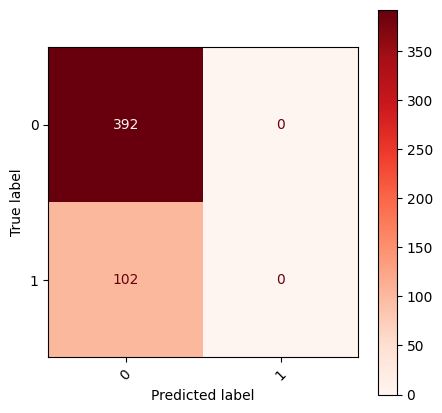

In [22]:
clf_G=svm.SVC(kernel='rbf') # now: Gaussian rbf kernel and one-rest labels:
results_svml=cross_validate(clf_G,X_train,y_train_one_vs_rest,cv=10,scoring='accuracy')

print("results:", results_svml['test_score'])
print("mean score:", np.mean(results_svml['test_score']))
print("standardd deviation:", np.std(results_svml['test_score']))
clf_G.fit(X_train,y_train_one_vs_rest)
y_pred = clf_G.predict(x_val)
print(accuracy_score(y_pred,y_val_one_vs_rest))
print("rmse=", math.sqrt(mean_squared_error(y_pred,y_val_one_vs_rest)))

matrix = ConfusionMatrixDisplay.from_estimator(
        clf_G,
        x_val,
        y_val_one_vs_rest,
        cmap=plt.cm.Reds,
        xticks_rotation=45
    )
matrix.figure_.set_size_inches(5,5)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#Decision trees

accuracy = 0.7935222672064778
rmse= 0.4543982094963869


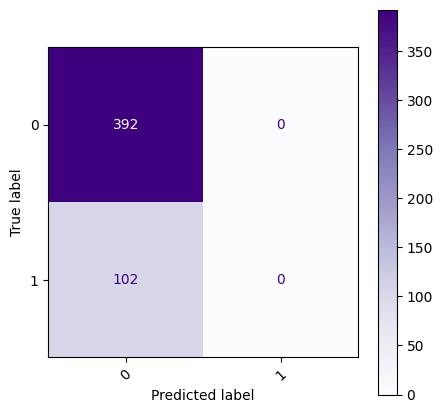

In [24]:
#first try 1 depth of tree
decTree=DecisionTreeClassifier(max_depth=1, random_state=42)
decTree.fit(X_train,y_train_one_vs_rest)

# check the model's accuracy and confusion matrix:
y_pred = decTree.predict(x_val)
print("accuracy =", accuracy_score(y_pred, y_val_one_vs_rest))
print("rmse=", math.sqrt(mean_squared_error(y_pred,y_val_one_vs_rest)))

matrix2 = ConfusionMatrixDisplay.from_estimator(
        decTree,
        x_val,
        y_val_one_vs_rest,
        cmap=plt.cm.Purples,
        xticks_rotation=42
    )
matrix2.figure_.set_size_inches(5,5)

[Text(0.5, 0.75, 'event_8_count <= -0.779\ngini = 0.323\nsamples = 1482\nvalue = [1182, 300]\nclass = 0'),
 Text(0.25, 0.25, 'gini = 0.136\nsamples = 367\nvalue = [340, 27]\nclass = 0'),
 Text(0.75, 0.25, 'gini = 0.37\nsamples = 1115\nvalue = [842, 273]\nclass = 0')]

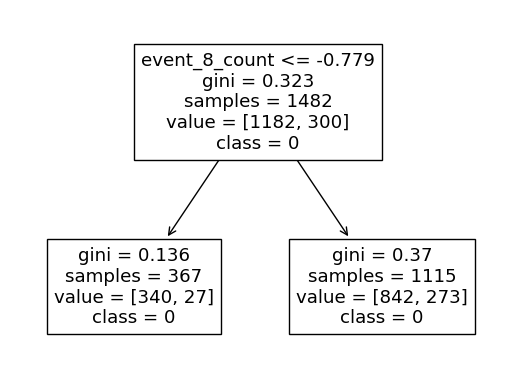

In [ ]:
# now visualize the decisionn tree itself as this gave very bad results:
plot_tree(decTree, feature_names=X_train.columns, class_names=np.unique(y_train_one_vs_rest.astype(str)))

In [29]:
models = {}
models["dt_1"]=DecisionTreeClassifier(max_depth=1, random_state=42)
models["dt_2"]=DecisionTreeClassifier(max_depth=2, random_state=42)
models["dt_3"]=DecisionTreeClassifier(max_depth=3, random_state=42)
models["dt_4"]=DecisionTreeClassifier(max_depth=4, random_state=42)
models["dt_5"]=DecisionTreeClassifier(max_depth=5, random_state=42)
models["dt_unbounded"]=DecisionTreeClassifier(random_state=42)

for label, model in models.items():
    results=cross_validate(model,X_train,y_train_one_vs_rest,cv=10,scoring='accuracy')
    cv_acc=np.mean(results['test_score'])
    val_acc=model.fit(X_train,y_train_one_vs_rest).score(X_train,y_train_one_vs_rest)
    #model.fit(X_train, y_train)
    pred = decTree.predict(x_val)
    #commented out accuracy and precision, as cross validation's scores really shows better how better the decision trees will be with increasing levels/depth
    print(label, "accuracy =", accuracy_score(pred, y_val_one_vs_rest), "precision =", precision_score(pred, y_val_one_vs_rest, average=None))
    print(label, "cv_acc =", cv_acc, "val_acc=", val_acc)
    print(label, "rmse=", math.sqrt(mean_squared_error(pred,y_val_one_vs_rest)))



dt_1 accuracy = 0.7935222672064778 precision = [1. 0.]
dt_1 cv_acc = 0.7914973698530745 val_acc= 0.791497975708502
dt_1 rmse= 0.4543982094963869
dt_2 accuracy = 0.7935222672064778 precision = [1. 0.]
dt_2 cv_acc = 0.7914973698530745 val_acc= 0.791497975708502
dt_2 rmse= 0.4543982094963869
dt_3 accuracy = 0.7935222672064778 precision = [1. 0.]
dt_3 cv_acc = 0.7861055686559042 val_acc= 0.791497975708502
dt_3 rmse= 0.4543982094963869
dt_4 accuracy = 0.7935222672064778 precision = [1. 0.]
dt_4 cv_acc = 0.7726011246145474 val_acc= 0.7975708502024291
dt_4 rmse= 0.4543982094963869
dt_5 accuracy = 0.7935222672064778 precision = [1. 0.]
dt_5 cv_acc = 0.7604707056049338 val_acc= 0.8137651821862348
dt_5 rmse= 0.4543982094963869
dt_unbounded accuracy = 0.7935222672064778 precision = [1. 0.]
dt_unbounded cv_acc = 0.6902639216397606 val_acc= 1.0
dt_unbounded rmse= 0.4543982094963869


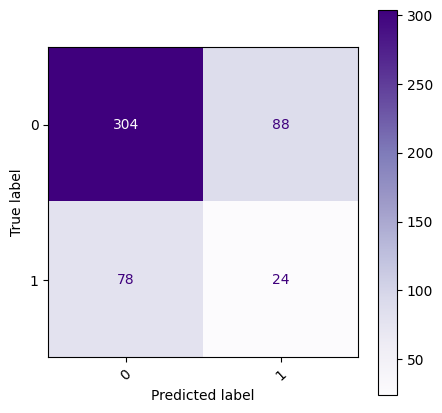

In [26]:
matrix2 = ConfusionMatrixDisplay.from_estimator(
        models["dt_unbounded"],
        x_val,
        y_val_one_vs_rest,
        cmap=plt.cm.Purples,
        xticks_rotation=42
    )
matrix2.figure_.set_size_inches(5,5)

[Text(0.4449969533426184, 0.9791666666666666, 'event_8_count <= -0.779\ngini = 0.323\nsamples = 1482\nvalue = [1182, 300]\nclass = 0'),
 Text(0.1615598885793872, 0.9375, 'mean_free_time1 <= 0.673\ngini = 0.136\nsamples = 367\nvalue = [340, 27]\nclass = 0'),
 Text(0.13788300835654596, 0.8958333333333334, 'sum_down_time <= 1.329\ngini = 0.226\nsamples = 162\nvalue = [141, 21]\nclass = 0'),
 Text(0.12674094707520892, 0.8541666666666666, 'mean_down_time <= 0.352\ngini = 0.21\nsamples = 159\nvalue = [140, 19]\nclass = 0'),
 Text(0.12116991643454039, 0.8125, 'event_7_mean <= 1.413\ngini = 0.274\nsamples = 116\nvalue = [97, 19]\nclass = 0'),
 Text(0.09749303621169916, 0.7708333333333334, 'mean_down_time <= 0.332\ngini = 0.239\nsamples = 108\nvalue = [93, 15]\nclass = 0'),
 Text(0.07799442896935933, 0.7291666666666666, 'max_cursor_position_change1 <= -0.147\ngini = 0.217\nsamples = 105\nvalue = [92, 13]\nclass = 0'),
 Text(0.055710306406685235, 0.6875, 'std_cursor_position_change1 <= 0.033\ngi

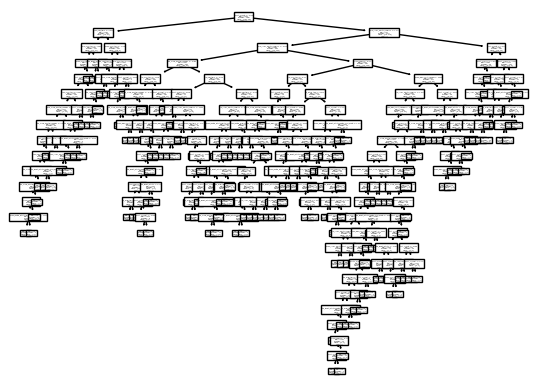

In [ ]:
plot_tree(models["dt_unbounded"], feature_names=X_train.columns, class_names=np.unique(y_train_one_vs_rest.astype(str)))

In [28]:
y_predicted = models['dt_unbounded'].predict(x_val)
print(math.sqrt(mean_squared_error(y_val_one_vs_rest, y_predicted)))
print("accuracy = ",accuracy_score(y_predicted, y_val_one_vs_rest))

0.5796830070512397
accuracy =  0.6639676113360324


accuracy = 0.0
0.4543982094963869


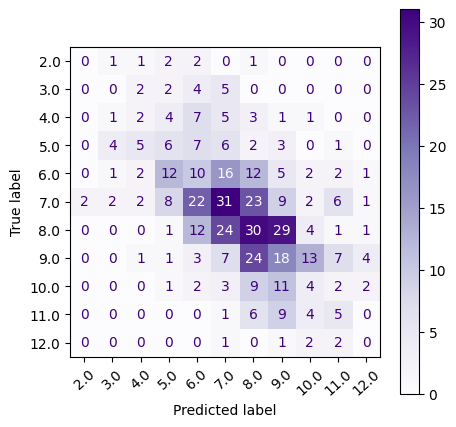

In [34]:
decTree5=DecisionTreeClassifier( random_state=42)
decTree5.fit(X_train,y_train*2)

# check the model's accuracy and confusion matrix:
predicted = decTree.predict(x_val)
print("accuracy =", accuracy_score(predicted, y_val*2))
print(math.sqrt(mean_squared_error(y_val_one_vs_rest, predicted)))

matrix5 = ConfusionMatrixDisplay.from_estimator(
        decTree5,
        x_val,
        y_val*2,
        cmap=plt.cm.Purples,
        xticks_rotation=42
    )
matrix5.figure_.set_size_inches(5,5)

In [35]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#Now I would experiement a little with ensemble models as well

In [37]:
# I just extend my models list with some new ones:
models['min_3'] = DecisionTreeClassifier(min_samples_split=3, random_state=42)
models['entropy'] = DecisionTreeClassifier(criterion='entropy', random_state=42)
models['alpha_2'] = DecisionTreeClassifier(ccp_alpha=0.2, random_state=42)

In [38]:
voters=VotingClassifier(estimators=[('dt_4', models["dt_4"]), ('min_3', models["min_3"]),
                                    ('entropy', models["entropy"]),
                                     ('alpha_2', models["alpha_2"])], n_jobs=-1)
voters.fit(X_train,y_train*2)

VotingClassifier(estimators=[('dt_4',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=42)),
                             ('min_3',
                              DecisionTreeClassifier(min_samples_split=3,
                                                     random_state=42)),
                             ('entropy',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=42)),
                             ('alpha_2',
                              DecisionTreeClassifier(ccp_alpha=0.2,
                                                     random_state=42))],
                 n_jobs=-1)

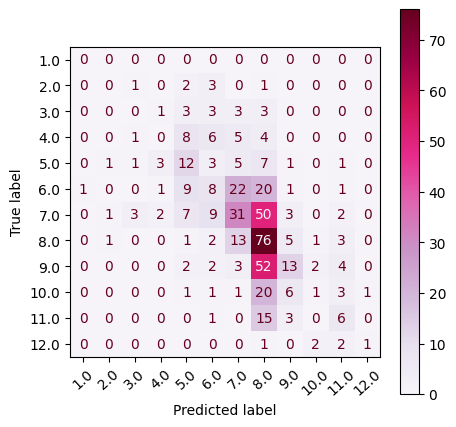

In [39]:
# now see some evaluations
matrixVoter = ConfusionMatrixDisplay.from_estimator(
        voters,
        x_val,
        y_val*2,
        cmap=plt.cm.PuRd,
        xticks_rotation=42
    )
matrixVoter.figure_.set_size_inches(5,5)

In [40]:
# let's also see a full classification report:
voter_predicted = voters.predict(x_val)
print(math.sqrt(mean_squared_error(y_val*2, voter_predicted)))
print("accuracy =", accuracy_score(voter_predicted, y_val*2))


1.7616012222965676
accuracy = 0.29959514170040485


In [48]:
voter_predicted

array([ 8.,  5.,  7.,  8.,  8.,  8.,  7.,  8., 11.,  9.,  7.,  8.,  7.,
        9.,  7.,  8.,  9.,  2., 10.,  8.,  9.,  9.,  7.,  8.,  9.,  8.,
        3.,  8.,  5.,  5.,  8.,  5.,  7.,  8.,  8.,  6.,  8.,  8.,  8.,
        8.,  8.,  6.,  9.,  5.,  8.,  8.,  8.,  8.,  8.,  9.,  7.,  8.,
        8.,  8.,  8.,  9.,  8.,  7.,  5.,  6.,  8.,  7.,  7., 11.,  8.,
        6.,  8.,  8.,  8.,  6.,  5.,  8.,  9.,  8.,  8.,  8.,  7.,  8.,
        7.,  8.,  8.,  8.,  8.,  8.,  6.,  8.,  5.,  8.,  8.,  5.,  5.,
        9.,  5.,  6.,  6.,  9.,  8.,  8.,  8.,  8., 10.,  6.,  8.,  8.,
        8.,  7.,  8.,  8.,  8.,  8.,  7.,  8.,  4.,  8.,  6.,  8.,  8.,
        8.,  7.,  8.,  8., 11.,  3.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        9.,  7.,  8.,  8.,  8.,  9.,  8.,  8.,  6.,  8.,  6.,  7., 11.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.,  8.,
        8.,  8.,  8.,  8.,  8.,  6.,  8.,  8.,  8.,  8.,  4.,  8.,  8.,
        8.,  8., 11.,  4.,  6.,  8.,  5.,  7.,  9.,  8.,  8.,  6

1.9398860519981171
accuracy = 0.24696356275303644


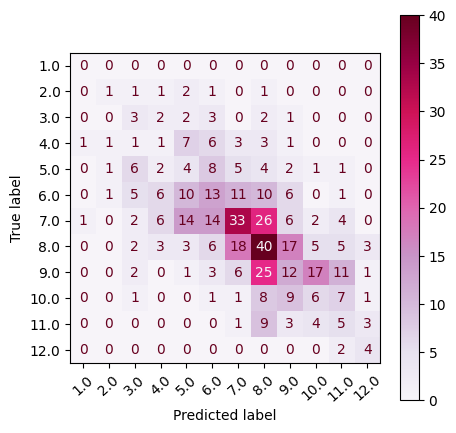

In [42]:
xgb = GradientBoostingClassifier(min_samples_leaf=3, max_depth=5, n_estimators=2, random_state=42, learning_rate=1.0)
xgb.fit(X_train, y_train*2)

xgb.n_estimators

#check the scores and report, as well as plot the confusion matrix
xgb_predicted = xgb.predict(x_val)

matrixGradient = ConfusionMatrixDisplay.from_estimator(
        xgb,
        x_val,
        y_val*2,
        cmap=plt.cm.PuRd,
        xticks_rotation=42
    )
matrixGradient.figure_.set_size_inches(5,5)

print(math.sqrt(mean_squared_error(y_val*2, xgb_predicted)))
print("accuracy =", accuracy_score(xgb_predicted, y_val*2))


In [47]:
xgb_predicted

array([ 8.,  5.,  7.,  8.,  8., 11.,  9., 11., 12.,  9.,  8.,  8.,  7.,
       10.,  6.,  8., 11.,  8.,  9.,  8.,  8.,  9.,  2., 11.,  7.,  8.,
        6.,  8.,  3.,  4.,  4.,  5.,  7.,  5.,  9., 11.,  8.,  7.,  8.,
        8.,  6.,  9.,  9.,  3.,  7.,  8., 10.,  7.,  8.,  9.,  4.,  8.,
       12.,  8., 11.,  9.,  8.,  6.,  9.,  5.,  8.,  6.,  6., 11.,  7.,
        6.,  8.,  6.,  3.,  5.,  7.,  5., 11.,  9.,  8.,  7.,  6.,  8.,
        3.,  6.,  9.,  8., 10.,  8.,  7.,  9.,  2.,  8.,  4.,  4.,  6.,
        7.,  5.,  5.,  6.,  8., 11.,  7.,  9.,  8., 10.,  5.,  8.,  8.,
        9.,  6.,  9.,  9., 10., 11.,  7.,  3.,  6., 10.,  8., 10., 10.,
        3.,  8.,  8.,  6., 11.,  7.,  8.,  8.,  6., 10.,  6.,  8.,  8.,
       10.,  5.,  8.,  8.,  8.,  9.,  4.,  1.,  8.,  8.,  6.,  7.,  8.,
        8.,  9.,  8.,  4.,  7., 10.,  8., 11.,  7.,  9.,  8.,  5.,  8.,
        8.,  7.,  8.,  7.,  9.,  6.,  4.,  7., 11.,  8.,  5.,  4.,  8.,
        6.,  7., 12.,  5.,  7., 11.,  7.,  7.,  3.,  8.,  4.,  5

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


1.4989875125407273
accuracy = 0.3097165991902834


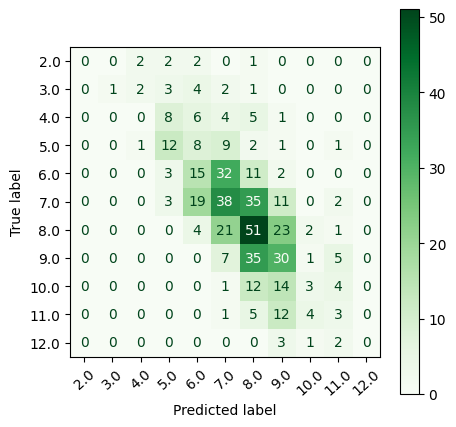

In [44]:
rf = RandomForestClassifier( random_state=0)

results=cross_validate(rf, X_train, y_train*2, cv=10, scoring='accuracy')
rf.fit(X_train,y_train*2)

rf_pred = rf.predict(x_val)
matrixRF = ConfusionMatrixDisplay.from_estimator(
        rf,
        predicted,
        y_val*2,
        cmap=plt.cm.Greens,
        xticks_rotation=42
    )
matrixRF.figure_.set_size_inches(5,5)

print(math.sqrt(mean_squared_error(y_val*2, rf_pred)))
print("accuracy =", accuracy_score(rf_pred, y_val*2))


3.3587760446654706
accuracy = 0.09109311740890688


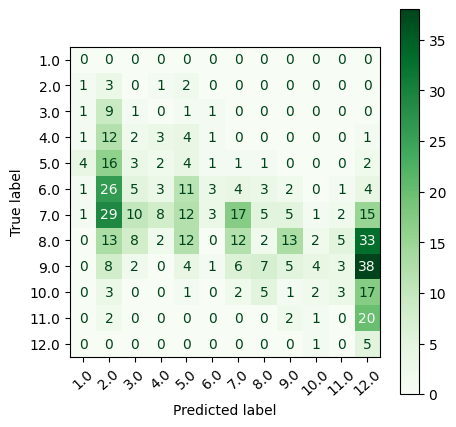

In [46]:
from sklearn.naive_bayes import GaussianNB

naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train*2)

predicted = naiveBayes.predict(x_val)

matrixRF = ConfusionMatrixDisplay.from_estimator(
        naiveBayes,
        x_val,
        y_val*2,
        cmap=plt.cm.Greens,
        xticks_rotation=42
    )
matrixRF.figure_.set_size_inches(5,5)

print(math.sqrt(mean_squared_error(y_val*2, predicted)))
print("accuracy =", accuracy_score(predicted, y_val*2))


In [ ]:
predicted

array([ 7.,  9.,  4.,  9.,  2.,  4.,  5., 11.,  9.,  2.,  9.,  9.,  9.,
        9.,  4.,  9.,  2.,  2.,  9.,  7.,  7., 12.,  9.,  5.,  2.,  2.,
        9., 10.,  9.,  8.,  2.,  9.,  4.,  9.,  9.,  4.,  2.,  9.,  9.,
        2.,  9.,  2.,  9.,  9.,  2.,  4.,  5.,  5.,  9.,  5.,  9.,  2.,
        2.,  2.,  2.,  2.,  5.,  4.,  4.,  6.,  9.,  2.,  4.,  4.,  4.,
        4.,  9.,  9.,  1.,  9.,  6.,  4.,  9., 12.,  9.,  9.,  9.,  1.,
        5.,  4.,  9.,  9.,  2.,  2.,  4.,  9.,  9.,  9.,  9.,  4.,  5.,
        9.,  7.,  2.,  2.,  9.,  4., 12.,  9.,  9.,  4.,  9.,  9.,  9.,
        8., 12.,  5.,  5.,  9.,  2.,  9.,  9.,  9.,  2.,  9., 12.,  9.,
       12.,  9.,  9.,  9.,  5.,  4.,  2.,  2.,  9.,  4.,  9.,  4.,  9.,
        9.,  5.,  2.,  5.,  2.,  2.,  9.,  4.,  4.,  9.,  1.,  9.,  5.,
        9.,  9.,  9.,  5.,  5.,  9.,  2., 12.,  4.,  4.,  2.,  1.,  2.,
        9.,  9.,  5.,  9.,  4.,  4.,  9., 10.,  9.,  9.,  2.,  2.,  4.,
        4.,  9.,  9., 11.,  9.,  5.,  9.,  5.,  9.,  4.,  9.,  2